# DKNG Analysis

In [1]:
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [2]:
DKNG_1 = pd.read_csv("DKNG.csv")
DKNG_2 = pd.read_csv("DKNG (1).csv")
DKNG_3 = pd.read_csv("DKNG (2).csv")

DKNG_1wk = pd.read_csv("DKNG wk.csv")
DKNG_2wk = pd.read_csv("DKNG (1)wk.csv")
DKNG_3wk = pd.read_csv("DKNG (2)wk.csv")

In [3]:
#scaling DKNG_1 to 2023 date scale
DKNG_1['Date'] = DKNG_1['Date'].str.replace('2021', '2023')
DKNG_1wk['Date'] = DKNG_1wk['Date'].str.replace('2021', '2023')

#scaling DKNG_2 to 2023 date scale
DKNG_2['Date'] = DKNG_2['Date'].str.replace('2022', '2023')
DKNG_2wk['Date'] = DKNG_2wk['Date'].str.replace('2022', '2023')

# Changing 'Date' column in each df to datetime
DKNG_1['Date'] = pd.to_datetime(DKNG_1['Date'])
DKNG_2['Date'] = pd.to_datetime(DKNG_2['Date'])
DKNG_3['Date'] = pd.to_datetime(DKNG_3['Date'])

DKNG_1wk['Date'] = pd.to_datetime(DKNG_1wk['Date'])
DKNG_2wk['Date'] = pd.to_datetime(DKNG_2wk['Date'])
DKNG_3wk['Date'] = pd.to_datetime(DKNG_3wk['Date'])

In [4]:
data_frames = [DKNG_1, DKNG_2, DKNG_3, DKNG_1wk, DKNG_2wk, DKNG_3wk]
scaler = MinMaxScaler()

# Scaling the 'Close' column in each DataFrame individually
for df in data_frames:
    df['Scaled_Close'] = scaler.fit_transform(df[['Close']])

Text(0.5, 1.0, 'DKNG Daily 2021, 2022, 2023 Scaled Closing Prices and Sports Events')

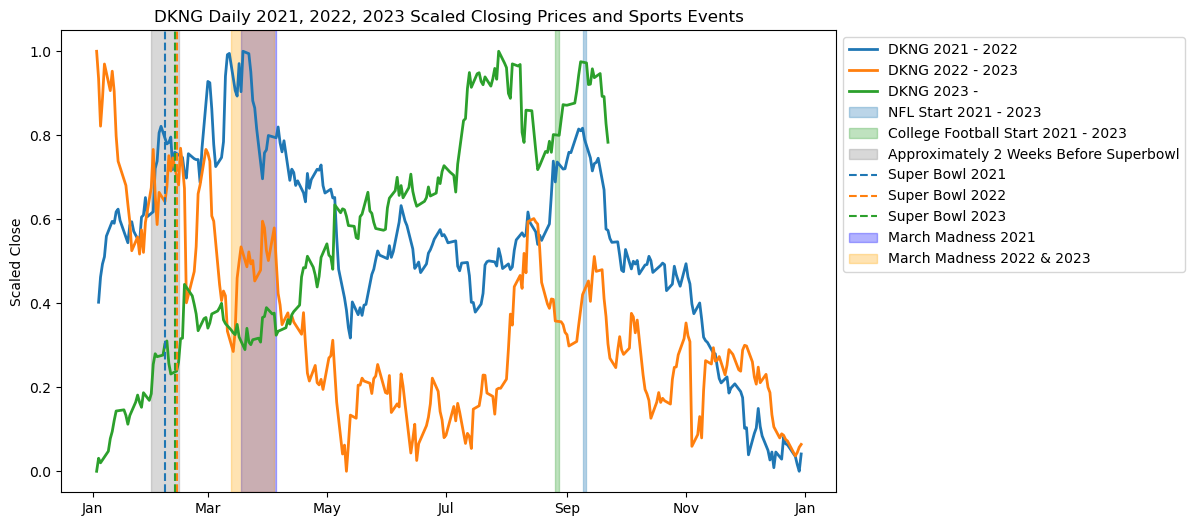

In [5]:
#plot 3 scaled dfs
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(DKNG_1['Date'], DKNG_1['Scaled_Close'], label='DKNG 2021 - 2022', linewidth=2)
ax.plot(DKNG_2['Date'], DKNG_2['Scaled_Close'], label='DKNG 2022 - 2023', linewidth=2)
ax.plot(DKNG_3['Date'], DKNG_3['Scaled_Close'], label='DKNG 2023 - ', linewidth=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

# Create shaded area for approx NFL Season (theyre only a day off in 2021, 2022, & 2023)
ax.axvspan(pd.to_datetime('2023-09-09'), pd.to_datetime('2023-09-11'), color='#1f77b4', alpha=0.3, label='NFL Start 2021 - 2023')

# Create shaded area for approx College Football Season
ax.axvspan(pd.to_datetime('2023-08-26'), pd.to_datetime('2023-08-28'), color='#2ca02c', alpha=0.3, label='College Football Start 2021 - 2023')

# Create shaded area for approx 2 Weeks Before Superbowl
ax.axvspan(pd.to_datetime('2023-01-31'), pd.to_datetime('2023-02-14'), color='grey', alpha=0.3, label='Approximately 2 Weeks Before Superbowl')

# Create line for Superbowl 2021
ax.axvline(pd.to_datetime('2023-02-07'), color='#1f77b4', linestyle='--', label='Super Bowl 2021')

# Create line for Superbowl 2022
ax.axvline(pd.to_datetime('2023-02-13'), color='#ff7f0e', linestyle='--', label='Super Bowl 2022')

# Create line for Superbowl 2023
ax.axvline(pd.to_datetime('2023-02-12'), color='#2ca02c', linestyle='--', label='Super Bowl 2023')

# Create shaded area for March Madness 2021
ax.axvspan(pd.to_datetime('2023-03-18'), pd.to_datetime('2023-04-05'), color='blue', alpha=0.3, label='March Madness 2021')

# Create shaded area for March Madness 2022 & 2023 (theyre a day apart)
ax.axvspan(pd.to_datetime('2023-03-13'), pd.to_datetime('2023-04-04'), color='orange', alpha=0.3, label='March Madness 2022 & 2023')


ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylabel('Scaled Close')
plt.title('DKNG Daily 2021, 2022, 2023 Scaled Closing Prices and Sports Events')

Text(0.5, 1.0, 'DKNG Weekly 2021, 2022, 2023 Scaled Closing Prices and Sports Events')

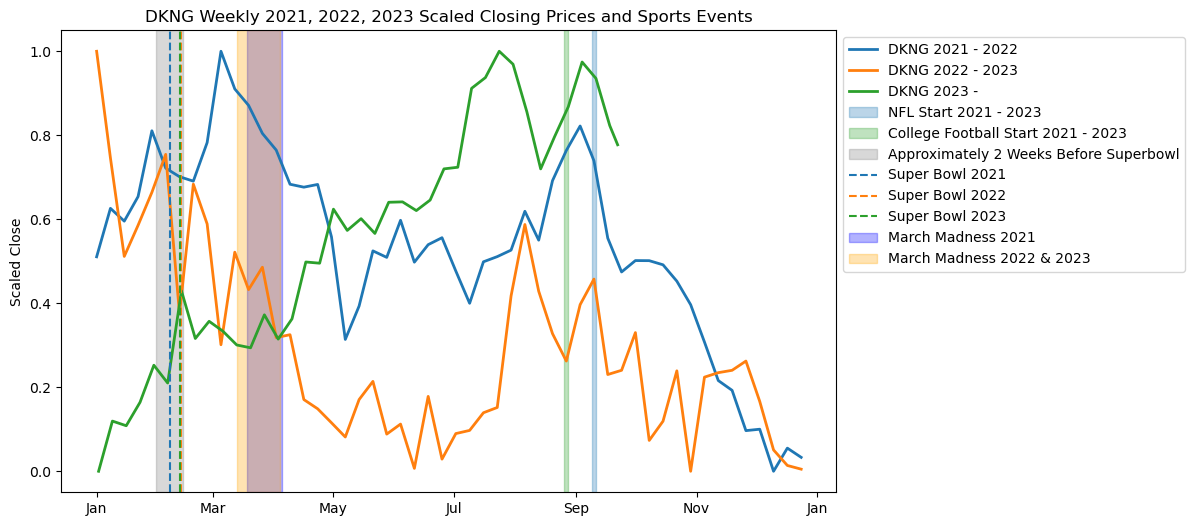

In [6]:
#plot 3 scaled dfs
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(DKNG_1wk['Date'], DKNG_1wk['Scaled_Close'], label='DKNG 2021 - 2022', linewidth=2)
ax.plot(DKNG_2wk['Date'], DKNG_2wk['Scaled_Close'], label='DKNG 2022 - 2023', linewidth=2)
ax.plot(DKNG_3wk['Date'], DKNG_3wk['Scaled_Close'], label='DKNG 2023 - ', linewidth=2)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

# Create shaded area for approx NFL Season (theyre only a day off in 2021, 2022, & 2023)
ax.axvspan(pd.to_datetime('2023-09-09'), pd.to_datetime('2023-09-11'), color='#1f77b4', alpha=0.3, label='NFL Start 2021 - 2023')

# Create shaded area for approx College Football Season
ax.axvspan(pd.to_datetime('2023-08-26'), pd.to_datetime('2023-08-28'), color='#2ca02c', alpha=0.3, label='College Football Start 2021 - 2023')

# Create shaded area for approx 2 Weeks Before Superbowl
ax.axvspan(pd.to_datetime('2023-01-31'), pd.to_datetime('2023-02-14'), color='grey', alpha=0.3, label='Approximately 2 Weeks Before Superbowl')

# Create line for Superbowl 2021
ax.axvline(pd.to_datetime('2023-02-07'), color='#1f77b4', linestyle='--', label='Super Bowl 2021')

# Create line for Superbowl 2022
ax.axvline(pd.to_datetime('2023-02-13'), color='#ff7f0e', linestyle='--', label='Super Bowl 2022')

# Create line for Superbowl 2023
ax.axvline(pd.to_datetime('2023-02-12'), color='#2ca02c', linestyle='--', label='Super Bowl 2023')

# Create shaded area for March Madness 2021
ax.axvspan(pd.to_datetime('2023-03-18'), pd.to_datetime('2023-04-05'), color='blue', alpha=0.3, label='March Madness 2021')

# Create shaded area for March Madness 2022 & 2023 (theyre a day apart)
ax.axvspan(pd.to_datetime('2023-03-13'), pd.to_datetime('2023-04-04'), color='orange', alpha=0.3, label='March Madness 2022 & 2023')


ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylabel('Scaled Close')
plt.title('DKNG Weekly 2021, 2022, 2023 Scaled Closing Prices and Sports Events')